<h3> Importowanie najwazniejszych bibliotek <h3>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, f_oneway, kruskal, mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [29]:
# Importowanie pliku z danymi. Pliki z danymi to EDC3, Pab1, HSP104
file_name = 'data/EDC3.xlsx'
# zczytanie danych
data = pd.read_excel(file_name)

In [30]:
# wizualizacja struktury danych
data.head(10)


,Nazwa,"Ilosc kom,","Ilosc kom, fluo",photo area,Intensywnosc swiecenia,std,proba
0,By,24.0,19.0,5002624.0,1.640,14.256,1
1,By,84.0,81.0,5002624.0,3.426,23.187,1
2,By,16.0,5.0,5002624.0,0.080,3.704,1
3,By,10.0,5.0,5002624.0,0.049,2.856,1
4,By,15.0,11.0,5002624.0,0.833,11.219,1
5,By,8.0,9.0,5002624.0,0.079,3.196,1
6,By,25.0,23.0,5002624.0,1.240,12.357,1
7,By,28.0,22.0,5002624.0,1.064,11.423,1
8,By,43.0,27.0,5002624.0,0.670,10.718,1
9,By,82.0,87.0,5002624.0,1.677,17.297,1


In [31]:
name_of_yeasts = ['By', 'VPS[-]', 'vps tef', 'vps mut', 'VK[-]', 'vk tef', 'vk mut']
mean_dict = {}
for name in name_of_yeasts:
    sum_of_density = 0
    number_of_elements = 0
    for i in range(len(data)):
        if name == data['Nazwa'][i]:
            sum_of_density += data["Intensywnosc swiecenia"][i]
            number_of_elements += 1
    mean_dict[name] = sum_of_density/number_of_elements
print(mean_dict)

data['mean'] = data['Nazwa'].map(mean_dict)
grouped_data = data.groupby('Nazwa')['Intensywnosc swiecenia'].std().reset_index()
data = pd.merge(data, grouped_data, how='left', left_on='Nazwa', right_on='Nazwa')
data = data.rename(columns={'Intensywnosc swiecenia_y': 'standard_deviation'})

data['standarized_density'] = (data['Intensywnosc swiecenia_x'] - data['mean']) / data['standard_deviation']



{'By': 0.6021666666666667, 'VPS[-]': 1.0366944444444446, 'vps tef': 1.5854722222222222, 'vps mut': 1.0809411764705879, 'VK[-]': 1.0732727272727272, 'vk tef': 0.979060606060606, 'vk mut': 0.3351333333333332}


In [32]:
data.head(10)

,Nazwa,"Ilosc kom,","Ilosc kom, fluo",photo area,Intensywnosc swiecenia_x,std,proba,mean,standard_deviation,standarized_density
0,By,24.0,19.0,5002624.0,1.640,14.256,1,0.602167,0.640235,1.621020
1,By,84.0,81.0,5002624.0,3.426,23.187,1,0.602167,0.640235,4.410621
2,By,16.0,5.0,5002624.0,0.080,3.704,1,0.602167,0.640235,-0.815586
3,By,10.0,5.0,5002624.0,0.049,2.856,1,0.602167,0.640235,-0.864006
4,By,15.0,11.0,5002624.0,0.833,11.219,1,0.602167,0.640235,0.360545
5,By,8.0,9.0,5002624.0,0.079,3.196,1,0.602167,0.640235,-0.817148
6,By,25.0,23.0,5002624.0,1.240,12.357,1,0.602167,0.640235,0.996249
7,By,28.0,22.0,5002624.0,1.064,11.423,1,0.602167,0.640235,0.721350
8,By,43.0,27.0,5002624.0,0.670,10.718,1,0.602167,0.640235,0.105951
9,By,82.0,87.0,5002624.0,1.677,17.297,1,0.602167,0.640235,1.678811


Statystyka testowa: nan, P-value: 1.0
Dane mają rozkład normalny.


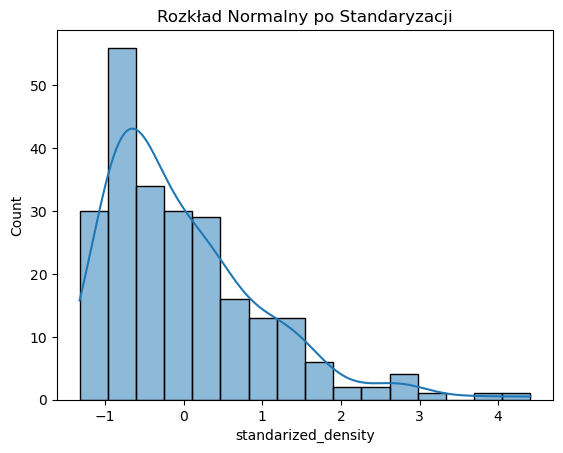

Test ANOVA: Statystyka testowa: 1.236213567344232e-30, P-value: 1.0
Brak istotnych różnic między grupami.


In [33]:
alpha = 0.05
stat, p_value = shapiro(data['standarized_density'])
print(f'Statystyka testowa: {stat}, P-value: {p_value}')

if p_value > alpha:
    print("Dane mają rozkład normalny.")
    # Wykres rozkładu normalnego
    sns.histplot(data['standarized_density'], kde=True)
    plt.title('Rozkład Normalny po Standaryzacji')
    plt.show()

    # Test ANOVA (parametryczny)
    wyniki_anova = f_oneway(
        data['standarized_density'][data['Nazwa'] == 'By'],
        data['standarized_density'][data['Nazwa'] == 'VPS[-]'],
        data['standarized_density'][data['Nazwa'] == 'vps tef'],
        data['standarized_density'][data['Nazwa'] == 'vps mut'],
        data['standarized_density'][data['Nazwa'] == 'VK[-]'],
        data['standarized_density'][data['Nazwa'] == 'vk tef'],
        data['standarized_density'][data['Nazwa'] == 'vk mut'],
    )

    print(f'Test ANOVA: Statystyka testowa: {wyniki_anova.statistic}, P-value: {wyniki_anova.pvalue}')

    if wyniki_anova.pvalue < alpha:
        # testy post hoc (Tukey HSD)
        tukey_results = pairwise_tukeyhsd(data['standarized_density'], data['Nazwa'])
        print(tukey_results)

        # Wykres pudełkowy z oznaczeniem istotnych różnic
        sns.boxplot(x='Nazwa', y='standarized_density', data=data)
        plt.title('Rozkład Intensywności Świecenia z Oznaczeniem Różnic Istotnych')
        plt.show()
    else:
        print("Brak istotnych różnic między grupami.")

else:
    print("Dane nie mają rozkładu normalnego.")
    # Wykres rozkładu nieparametrycznego
    sns.boxplot(x='Nazwa', y='standarized_density', data=data)
    plt.title('Rozkład Nieparametryczny')
    plt.show()
    median_dict = {}
    for name in name_of_yeasts:
        median_dict[name] = data.loc[data['Nazwa'] == name, 'Intensywnosc swiecenia_x'].median()

    data['median'] = data['Nazwa'].map(median_dict)

    # Test Kruskala-Wallisa
    stat, p_value = kruskal(
        data.loc[data['Nazwa'] == 'By', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'VPS[-]', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vps tef', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vps mut', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'VK[-]', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vk tef', 'Intensywnosc swiecenia_x'],
        data.loc[data['Nazwa'] == 'vk mut', 'Intensywnosc swiecenia_x'],
    )

    if p_value < alpha:
        print(f'Test Kruskala-Wallisa: Statystyka testowa: {stat}, P-value: {p_value}')

        # Testy porównawcze (Mann-Whitney)
        for i in range(len(name_of_yeasts)):
            for j in range(i + 1, len(name_of_yeasts)):
                group1 = data['Intensywnosc swiecenia_x'][data['Nazwa'] == name_of_yeasts[i]]
                group2 = data['Intensywnosc swiecenia_x'][data['Nazwa'] == name_of_yeasts[j]]
                stat, p_value = mannwhitneyu(group1, group2)
                print(f'Test Mann-Whitney dla {name_of_yeasts[i]} i {name_of_yeasts[j]}: Statystyka testowa: {stat}, P-value: {p_value}')



